In [1]:
import numpy as np
import pandas as pd
import mglearn

## Supervised Learning Basic

#### load dataset basic

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [7]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [8]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [10]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [11]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### train/test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [14]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

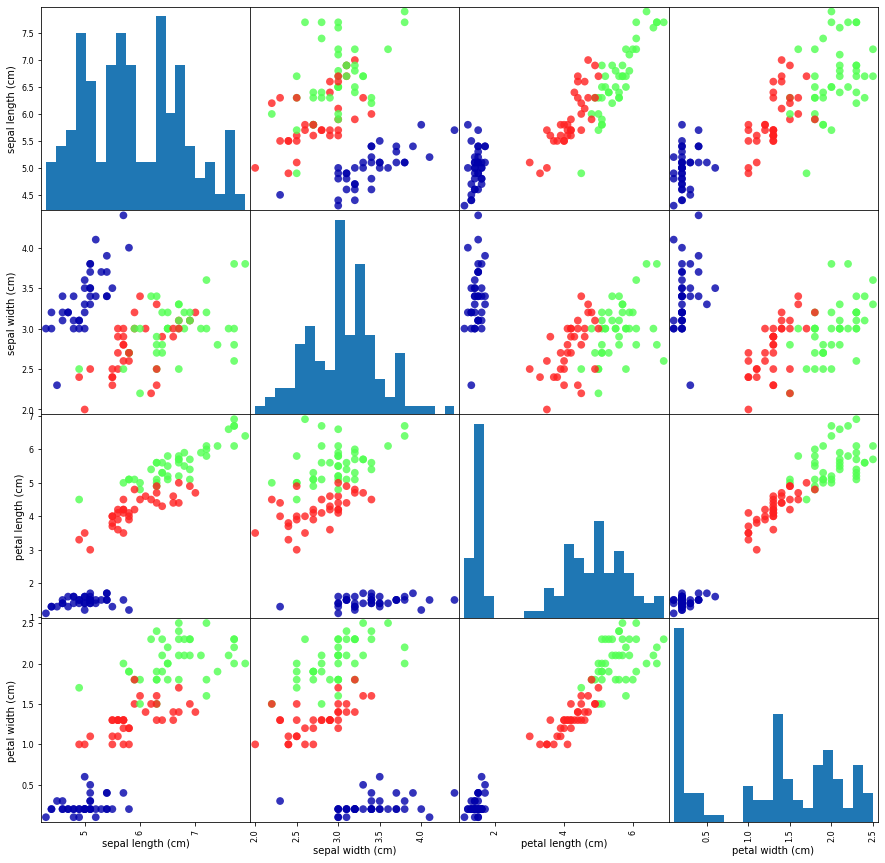

In [15]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

#### Building Your First Model: k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Making Predictions

In [18]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [19]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

In [20]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [21]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [22]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [23]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


#### Summary

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## Decision trees

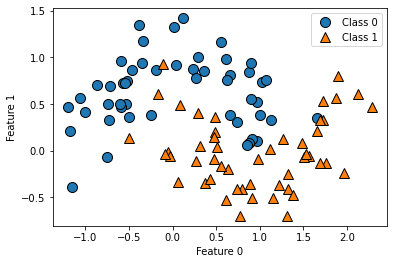

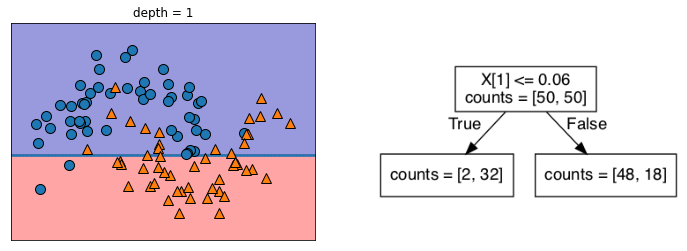

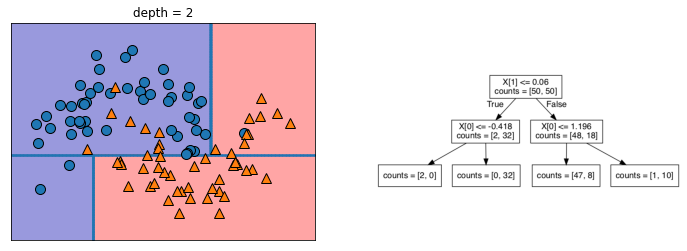

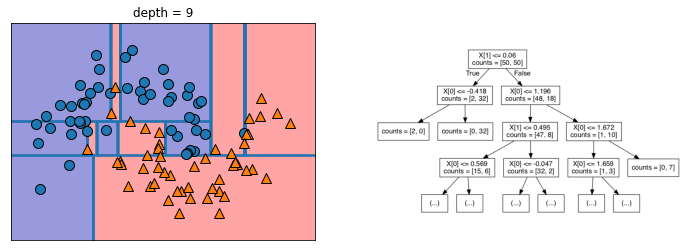

In [25]:
mglearn.plots.plot_tree_progressive()

##### DecisionTreeClassifier example

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [27]:
# data load : breast_cancer dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [28]:
# model training with labeled training data
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
# prediction
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

In [30]:
# evaluation
from sklearn.metrics import accuracy_score
print("Accuracy on training set: ", accuracy_score(y_train, y_train_hat))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

Accuracy on training set:  1.0
Accuracy on testing set:  0.9370629370629371


#### varying the hyperparameter

In [31]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [32]:
training_accuracy = []
test_accuracy = []

msl_settings = [1, 2, 5, 7, 10, 20]
for msl in msl_settings:
    # model training with labeled training data
    clf = DecisionTreeClassifier(min_samples_leaf= msl, random_state=0)
    clf.fit(X_train, y_train)

    # prediction
    y_train_hat = clf.predict(X_train)
    y_test_hat = clf.predict(X_test)

    # evaluation    
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [33]:
result = pd.DataFrame({"min_samples_leaf":msl_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

다른 hyperparameter도 바꿔가며 경향성을 확인해보세요. 

#### Visualizing Decision Trees

In [34]:
clf = DecisionTreeClassifier(min_samples_leaf= 10, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=0)

[Text(0.5769230769230769, 0.9166666666666666, 'X[20] <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.38461538461538464, 0.75, 'X[27] <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.23076923076923078, 0.5833333333333334, 'X[10] <= 0.524\ngini = 0.031\nsamples = 252\nvalue = [4, 248]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[21] <= 29.985\ngini = 0.016\nsamples = 242\nvalue = [2, 240]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 211\nvalue = [0, 211]'),
 Text(0.23076923076923078, 0.25, 'X[26] <= 0.204\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.5384615384615384, 0.5833333333333334, 'X[21] <= 25.62\ngini = 0.451\nsamples = 32\nvalue = [2

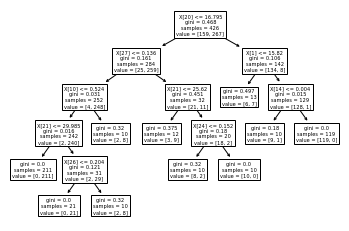

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)
# pdf로 저장해서 활용 가능

In [36]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

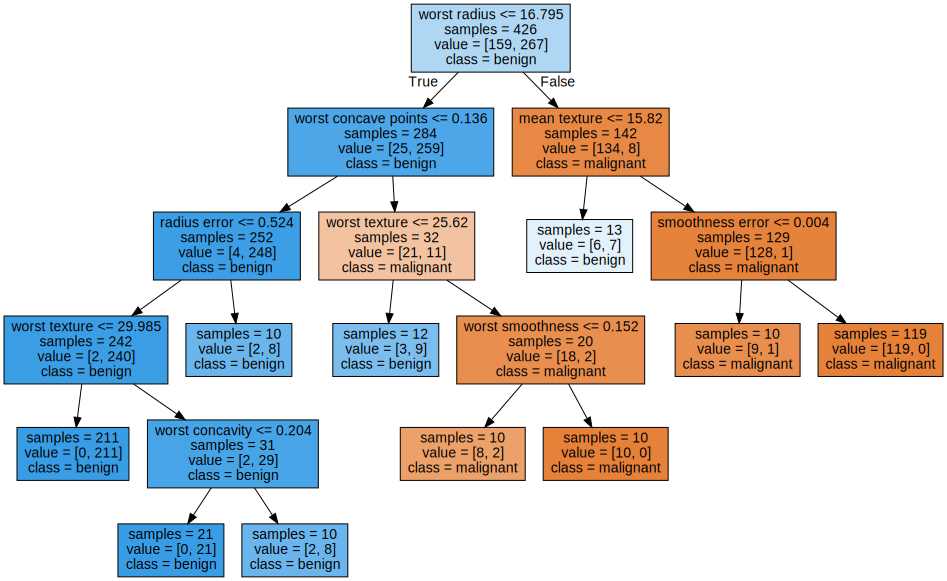

In [37]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees

In [38]:
print("Feature importances:")
print(clf.feature_importances_)

Feature importances:
[0.         0.03759604 0.         0.         0.         0.
 0.         0.         0.         0.         0.00399028 0.
 0.         0.         0.00104266 0.         0.         0.
 0.         0.         0.78335118 0.03708714 0.         0.
 0.00226055 0.         0.00306268 0.13160948 0.         0.        ]


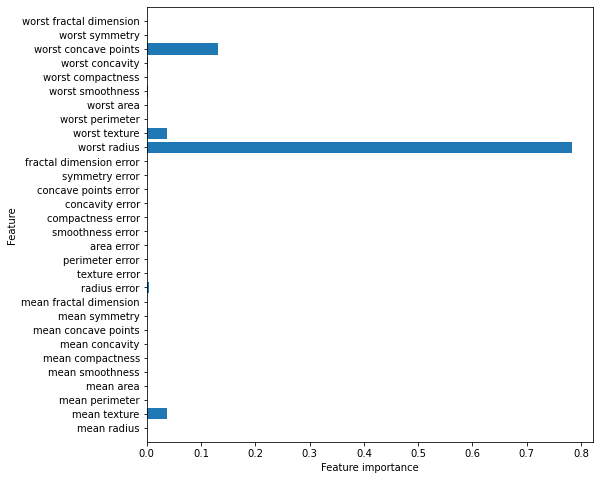

In [39]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(8,8))
plot_feature_importances_cancer(clf)

feature importance는 해당 feature의 방향성과 어떤 클래스를 지지하는지에 대한 정보는 제공하지 않음

Feature importances: [0. 1.]


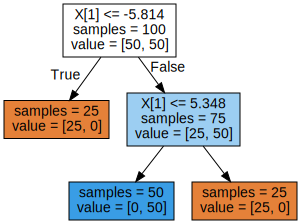

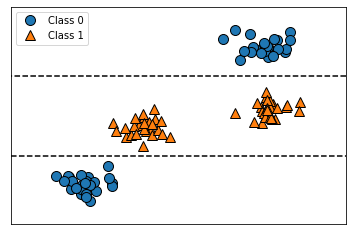

In [40]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#### DecisionTreeRegressor

Text(0, 0.5, 'Price in $/Mbyte')

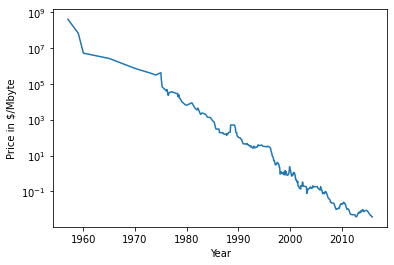

In [41]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [42]:
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


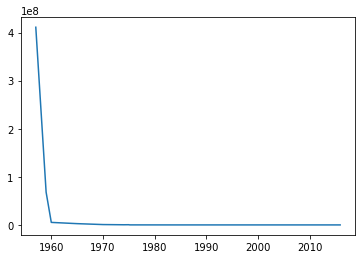

In [43]:
plt.plot(ram_prices.date, ram_prices.price)

In [44]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)

/var/folders/h8/sxlsbms534sc8_ln9tk771tr0000gn/T/ipykernel_1993/2023096756.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
/var/folders/h8/sxlsbms534sc8_ln9tk771tr0000gn/T/ipykernel_1993/2023096756.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


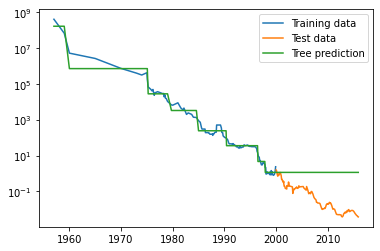

In [45]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.legend()

DecisionTreeRegressor는 extrapolation(외삽)능력이 떨어진다.